# Project Business Statistics: E-news Express


## Problem Statement:
# The problem revolves around the decline in new monthly subscribers for E-news Express, an online news portal. Despite the advantages of electronic news delivery, the current webpage is not effectively engaging users, leading to fewer subscriptions. The company aims to understand user interactions better and improve engagement through a redesigned landing page.

## Objective:
# Evaluate the effectiveness of a newly designed landing page compared to the old one in attracting new subscribers. This will be achieved through analyzing data resulting from A/B testing, where user responses to both versions of the landing page were captured. The goal is to determine if the new features on the landing page significantly increase the number of new subscribers,and overall time spent using statistical analysis to validate the findings.

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
Enews_df = pd.read_csv('/content/drive/MyDrive/Enews/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#Viewing first few rows
Enews_df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#Viewing the last few rows
Enews_df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#Checking for datatypes of each column
Enews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
#Checking size of dataset
Enews_df.shape

(100, 6)

In [ ]:
#Checking for missing data
Enews_df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [ ]:
#Descriptive Statistics for the dataset

Enews_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [ ]:
#Checking for Duplicates
Enews_df.duplicated().sum()

np.int64(0)

### Univariate Analysis

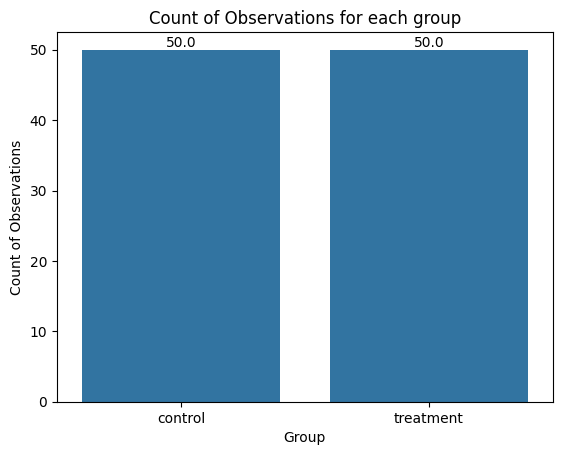

In [ ]:
#Graphing the Count of Observations for each group. Control v Treatment.
ax = sns.countplot(data=Enews_df,x= 'group')

for bar in ax.patches:
  bar_height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2, bar_height, f'{bar_height}', ha='center', va='bottom')

plt.xlabel('Group')
plt.ylabel('Count of Observations')
plt.title('Count of Observations for each group')
plt.show()

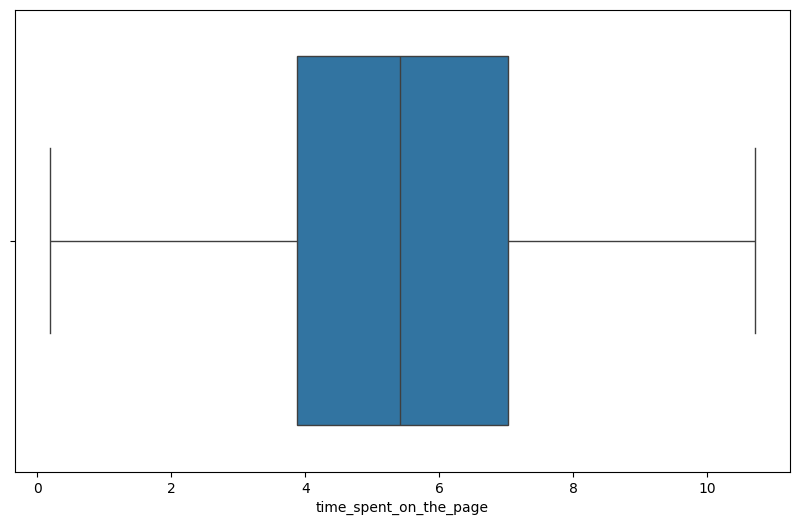

In [ ]:
#Boxplot of time spent on each page
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_spent_on_the_page', data=Enews_df)
plt.show()

In [ ]:
#Conversion rate for subscription
conversion_rate = Enews_df['converted'].value_counts(normalize=True) * 100
print("Conversion rate for subscription: (%)")
print(conversion_rate)

Conversion rate for subscription: (%)
converted
yes    54.0
no     46.0
Name: proportion, dtype: float64


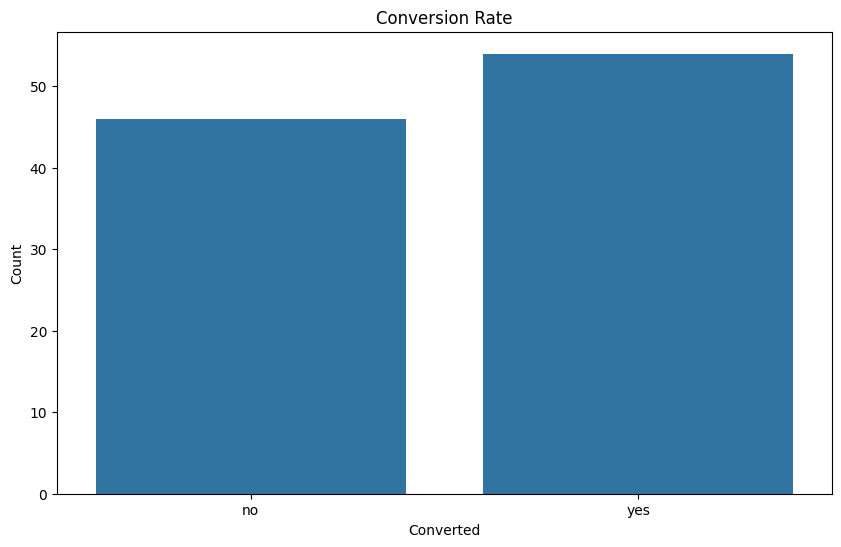

In [ ]:
#Bar Plot for conversion rate
plt.figure(figsize=(10, 6))
sns.countplot(x='converted', data=Enews_df)
plt.xlabel('Converted')
plt.ylabel('Count')
plt.title('Conversion Rate')
plt.show()

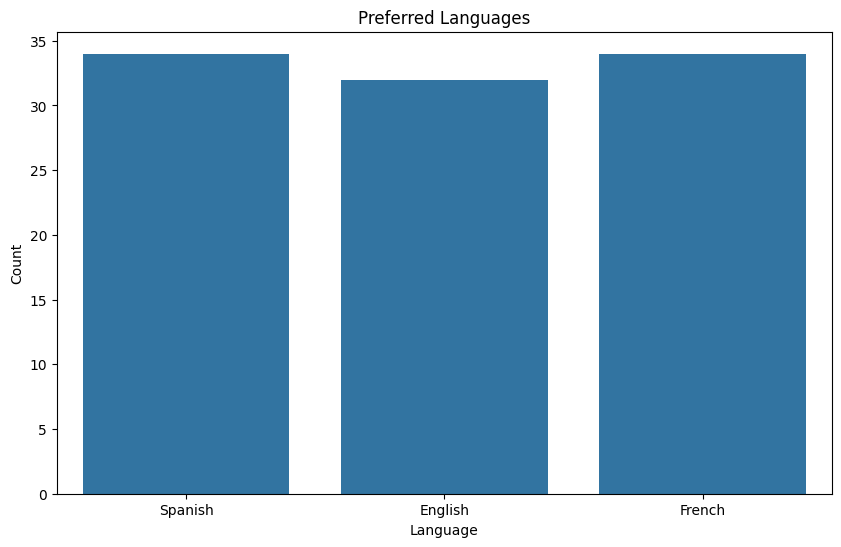

In [ ]:
#Bar Plot for preferred languages
plt.figure(figsize=(10, 6))
sns.countplot(x='language_preferred', data=Enews_df)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Preferred Languages')
plt.show()

### Bivariate Analysis

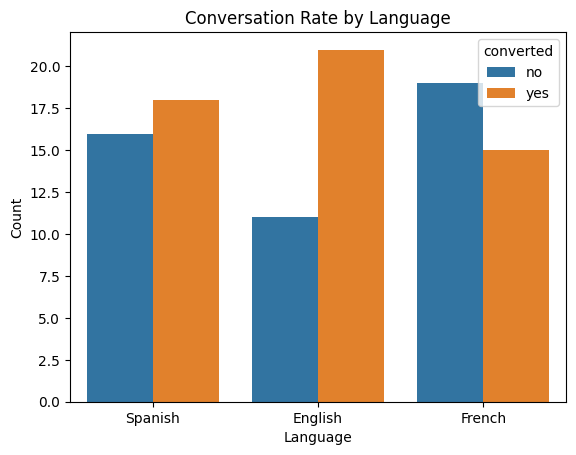

In [ ]:
#Conversation rate based on language
sns.countplot(x='language_preferred', hue='converted', data=Enews_df)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Conversation Rate by Language')
plt.show()


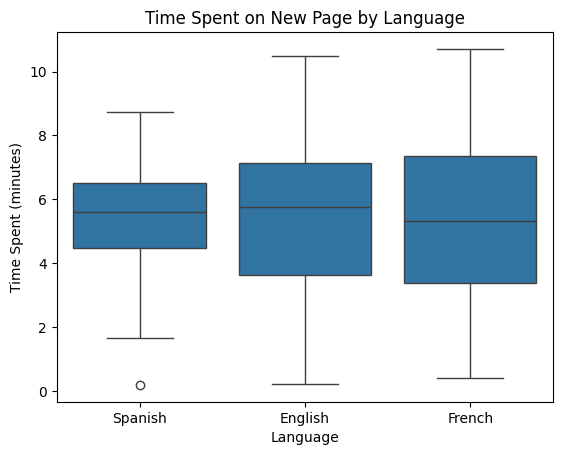

In [ ]:
#Time spent on new page based on different languages
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=Enews_df)

plt.xlabel('Language')
plt.ylabel('Time Spent (minutes)')
plt.title('Time Spent on New Page by Language')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

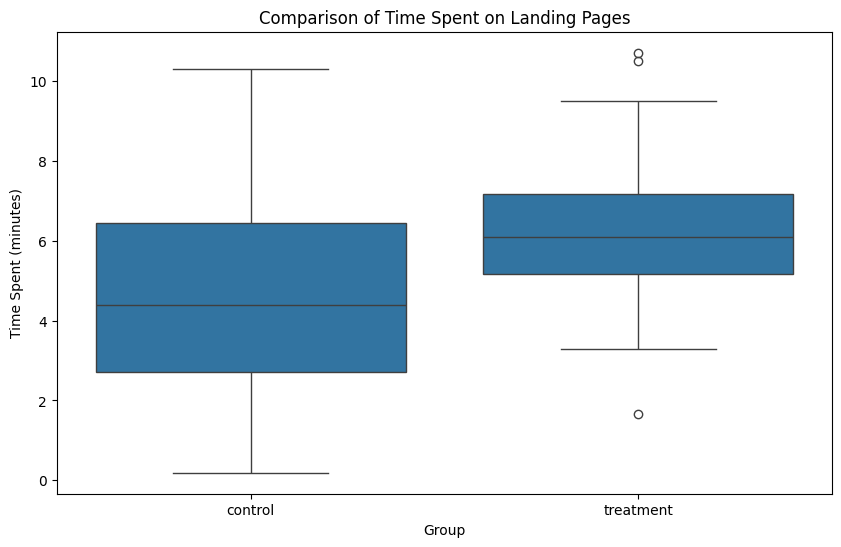

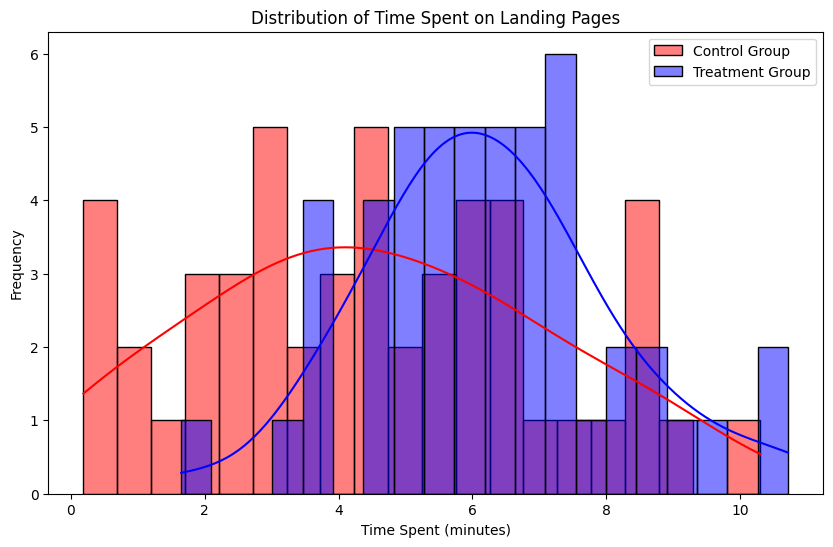

In [ ]:
#Seperating Data into Control Group and Treatment Group
control_group = Enews_df[Enews_df['group'] == 'control']
treatment_group = Enews_df[Enews_df['group'] == 'treatment']

#Creating a Box Plot to Compare the time spent
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='time_spent_on_the_page', data=Enews_df)
plt.title('Comparison of Time Spent on Landing Pages')
plt.xlabel('Group')
plt.ylabel('Time Spent (minutes)')
plt.show()

#Creating a histogram for each group
plt.figure(figsize=(10, 6))
sns.histplot(control_group['time_spent_on_the_page'], label='Control Group', bins= 20, color='red', kde=True)
sns.histplot(treatment_group['time_spent_on_the_page'], label='Treatment Group', bins=20, color= 'blue',kde=True)
plt.title('Distribution of Time Spent on Landing Pages')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

In [ ]:
#Null Hypothesis = Mean time spent on new landing page is equal to mean time spent on the old landing page
#Alternate Hypothesis = Mean time spent on new landing page is greater than to mean time spent on the old landing page

### Step 2: Select Appropriate test

In [ ]:
#Testing using 2 sample independent t-test

### Step 3: Decide the significance level

In [ ]:
Level_of_significance = 0.05

### Step 4: Collect and prepare data

In [ ]:
#Collecting data for test

from scipy.stats import ttest_ind

#Seperating Group data
control_time_spent = Enews_df[Enews_df['group'] == 'control']['time_spent_on_the_page']
treatment_time_spent = Enews_df[Enews_df['group'] == 'treatment']['time_spent_on_the_page']

#Peforming the T-test
t_stat,p_value= ttest_ind(control_time_spent, treatment_time_spent, alternative='greater')




### Step 5: Calculate the p-value

In [ ]:
#Results
print("P-value:", p_value)

P-value: 0.9998683876471904


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < Level_of_significance:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


### Step 7:  Draw inference

In [ ]:
#Fail to reject the Null Hypothesis

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [ ]:
#Null Hypthesis = The conversion rate for the new landing page is the same as the old landing page
#Alternative Hypothesis = The conversion rate for the new landing page is greater

In [ ]:
from statsmodels.stats.proportion import proportions_ztest


#Converting the converted column to binary values

Enews_df['converted']= Enews_df['converted'].apply(lambda x: 1 if x == 'yes' else 0)

#Calculating number of conversions and total users for each landing page
conversion_counts = Enews_df.groupby('landing_page')['converted'].sum()
total_counts = Enews_df.groupby('landing_page')['converted'].count()

#Extracting Data for Z-test
conversions= [conversion_counts['new'], conversion_counts['old']]
nobs = [total_counts['new'], total_counts['old']]

#Performing Z-test
z_stat, p_value = proportions_ztest(conversions, nobs)

#Printing Results
print("P-value:", p_value)

if p_value < Level_of_significance:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



P-value: 0.016052616408112556
Reject the null hypothesis


## 3. Is the conversion and preferred language are independent or related?

In [ ]:
#Null Hypothesis = Conversion Rate and Preferred language are independent
#Alternative Hypthesis = Conversion Rate and Preferred Language are related

#IMPORTING CHI-SQUARE TEST
from scipy.stats import chi2_contingency

#Creating a contingency table
contingency_table = pd.crosstab(Enews_df['language_preferred'], Enews_df['converted'])

#Performing Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

#Interpretaion
print("P-value:", p_value)

if p_value < Level_of_significance:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

P-value: 0.2129888748754345
Fail to reject the null hypothesis


## 4. Is the time spent on the new page same for the different language users?

In [ ]:
#Null Hypothesis = The mean time spent on the new page is the same for all language groups
#Alternative Hypothesis = The mean time spent on the new page is different for at least one language group

#IMPORTING ANOVA TEST
from scipy.stats import f_oneway

#Filter Data
new_page_data = Enews_df[Enews_df['landing_page'] == 'new']

#Grouping the time spent by langugage
grouped_data = new_page_data.groupby('language_preferred')['time_spent_on_the_page'].apply(list)


#Performing ANOVA Test
f_statistic, p_value = f_oneway(*grouped_data)

#Printing Results
print("P-value:", p_value)

if p_value < Level_of_significance:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



P-value: 0.43204138694325955
Fail to reject the null hypothesis


## Conclusion and Business Recommendations

# Conclusion:
### The new page does not significantly increase the time users spend on it.
### It doesn't show any differences in engagement or conversion rates across different language groups.
### The new page does siginificantly improve the overall conversion rate

# Business Recommendations:
### Adopt the New Landing Page- I think a big improvement with growth in the overall conversion rate makes it a good enough upgrade alone.
### Target Broader-User Segments-- Language doesn't seem to impact engagement or conversion so focus on other strategies to improve in these areas.
### Investigate user behavior beyond time spent-- Click through rates, scroll depth, etc. could be worth exploring.
### Focus on retention strategies--- such as some sort of reward for subscribing.


___